In [1]:
#%autosave 0 #if I uncomment it, it means autosave disavbled. Otherwise Jupyternotebook saves every 2 mins or so.

start of video: [ML Zoomcamp 4.1 - Evaluation Metrics: Session Overview](https://www.youtube.com/watch?v=gmg5jw1bM8A&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=40)

# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. We build a model with logistic regression for scoring existing customers and assigned them a probability of this customer leaving a company. We trained a model and our accuracy was 80%. In this module we'll try to find out, what does it actually mean. Is it a good score or not. Or, are there other ways of evaluating binary classification models. How do we know if it's good? We'll continue with the same dataset as previous module. 

## 4.1 Evaluation metrics: session overview

* Dataset: [https://www.kaggle.com/blastchar/telco-customer-churn](https://www.kaggle.com/blastchar/telco-customer-churn)

* [https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv)

*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

This week we'll look at this number (accuracy) and compare it with a baseline model and see how good this number is, 80% is good or not. Then we'll look at different types of errors e.g. we think that a customer is churning but they are not or other ways, different types of correct decisions, Then we'll see how to put these numbers in a table (called as confusion table). Then we'll look at Precision and Recall, which are good evaluation metrics for binaray classification problem. Then we'll talk about ROC (Receiver Opearing Characteristics) curves. This gives us a way to evaluate a model. With ROC curves we'll be able to evaluate the quality of soft predictions. Then we'll look at the area under the ROC curve, which is the most important metric for binary classification problems. Then we'll finish this week by talking about cross-validation, which is a way of validating our model. It is a more involved process. It has both advantages and disadvanteges. We'll look at it.

end of video: [ML Zoomcamp 4.1 - Evaluation Metrics: Session Overview](https://www.youtube.com/watch?v=gmg5jw1bM8A&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=40)

start of video: [ML Zoomcamp 4.2 - Accuracy and Dummy Model](https://www.youtube.com/watch?v=FW_l7lB0HUI&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=41&t=3s)

## 4.2 Accuracy and dummy model

Here we'll look at accuracy and discuss if 80% accuracy is good enough or not. **Accuracy** is fraction of customers that we predicted rightly.

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [9]:
len(y_val)

1409

Let's see how many coreect decisions we made:

In [10]:
(y_val == churn_decision).sum()

1132

In [11]:
1132/1409

0.8034066713981547

We used the threshold of 0.5. But did we use it? Is it good or not? Let's find out.

*At this point I have the feeling that, we'll look at accuracy as a a function of threshold.*

In [12]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Each of thresholds, we can use as an individual threshold.

In [13]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f  %.3f' %(t, score))
    scores.append(score)

0.00  0.274
0.05  0.509
0.10  0.591
0.15  0.666
0.20  0.710
0.25  0.739
0.30  0.760
0.35  0.772
0.40  0.785
0.45  0.793
0.50  0.803
0.55  0.801
0.60  0.795
0.65  0.786
0.70  0.766
0.75  0.744
0.80  0.735
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


We see above that 0.5 is the best threshold.

Text(0, 0.5, 'accuracy')

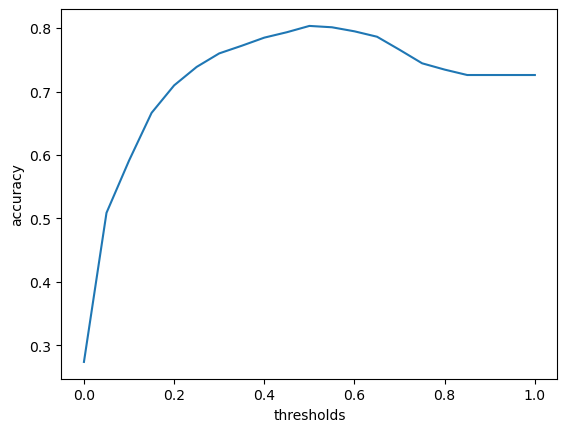

In [14]:
plt.plot(thresholds, scores)
plt.xlabel('thresholds')
plt.ylabel('accuracy')

In scikit-learn there ia already a function for calculating accuracy.

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [17]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f  %.3f' %(t, score))
    scores.append(score)

0.00  0.274
0.05  0.509
0.10  0.591
0.15  0.666
0.20  0.710
0.25  0.739
0.30  0.760
0.35  0.772
0.40  0.785
0.45  0.793
0.50  0.803
0.55  0.801
0.60  0.795
0.65  0.786
0.70  0.766
0.75  0.744
0.80  0.735
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


In [18]:
y_pred >= 1.0

array([False, False, False, ..., False, False, False])

In [19]:
from collections import Counter

In [20]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

Thus, we see that if we put threshold at 1, i.e. we treat a customer as churning if score is above 1, i.e. we say everyone is nonchurning, still we are 73% right. Thus we gained only 7% accuracy with our model. We were 73% right by treating everyone as nonchurning. Then why should bother about our model, if dummy model already gives us 73% accuracy.

In [21]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [22]:
y_val.mean()

0.2739531582682754

In [23]:
1 - y_val.mean()

0.7260468417317246

We see that 27% of users are non-churning.

Thus if we predict everyone as non-churning, then we are right 72% of the times. And if we predict everypne as churning, then we are right 27% of the times.

There is a **CLASS IMBALANCE**. We have lot more customers who are non-churning, here we have 3:1. Thus accuracy is a score, that can be quite misleading when we have **class imbalance**. There are other ways of evaluating binary classification models, that are quite useful.

Next lesson, we'll talk about confusion tables and different types of errors models can make.

end of video: [ML Zoomcamp 4.2 - Accuracy and Dummy Model](https://www.youtube.com/watch?v=FW_l7lB0HUI&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=41&t=3s)

start of video: [ML Zoomcamp 4.3 - Confusion Table](https://www.youtube.com/watch?v=Jt2dDLSlBng&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=42)

## 4.3 Confusion table

* Different types of errors and correct decisions
*  Arranging them in a table

Confusion table is a way of looking at different errors and correct decisions that our binary classification model makes. In the previouse session, we looked at accuracy. We looked at accuracy across different thresholds for making decisions. We noticed that if we have a dummy model, it is quite good compared to the model we have and the reason for that is we have **Class imbalance** in our dataset. If we predict that everyone is non-churning our model is quite good. We need to have a different way to evaluate the quality of our model, so that it is not affected by **Class imbalance**. For that, we'll start with **Confusion table**.

TRUE Positive:

False Positive:

TRUE Negative:

False Negative:

We'll implement above groups in numpy. 

In [24]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [25]:
actual_positive

array([False, False, False, ..., False,  True,  True])

In [26]:
actual_negative

array([ True,  True,  True, ...,  True, False, False])

In [27]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [28]:
predict_positive

array([False, False, False, ..., False,  True,  True])

In [29]:
predict_negative

array([ True,  True,  True, ...,  True, False, False])

Now let's combine above into True Positive, False Positive etc. groups.

In [30]:
predict_positive & actual_positive

array([False, False, False, ..., False,  True,  True])

In [31]:
tp = (predict_positive & actual_positive).sum() #tp= true positive
tp

210

In [32]:
tn = (predict_negative & actual_negative).sum() #tp= true positive
tn

922

In [33]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [34]:
(fp,fn)

(101, 176)

In [35]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

Above we see that we have tow different types of errors. Both false positive and false negatives are errors and makes us to loose money. We can also normalize this error.

In [36]:
confusion_matrix / confusion_matrix.sum()

array([[0.6543648 , 0.07168204],
       [0.12491128, 0.14904187]])

In [37]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

Above we see in terms of percentage. Thus, in **confusion table** we get better understanding of what kind of correct decisions or errors our model is making. From the values of confusion matrix, we can derive many more other matrix e.g. **Precision** and **Recall** in the next section. They are defined by some values in the confusion table. Then we'll also talk about ROC curve, that uses values from the confusion table in section 4.5.

end of video: [ML Zoomcamp 4.3 - Confusion Table](https://www.youtube.com/watch?v=Jt2dDLSlBng&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=42)

start of video: [ML Zoomcamp 4.4 - Precision and Recall](https://www.youtube.com/watch?v=gRLP_mlglMM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=43)

## 4.4 Precision and Recall

These are other metrics that can be used to evaluate the quality of ML models for **binary classification** problems. It can be extended to **Multiclass classification**, but then they'll be little different.

In [38]:
(tp+tn) / (tp+tn+fp+fn)

0.8034066713981547

Precision tells us fraction of positive predictions that turn out to be correct i.e tp/(tp+fp)

In [39]:
p = tp /(tp+fp)
p

0.6752411575562701

That was precision p. recall is little different. Recall is fraction of correctly identified churning users.

In [40]:
R = tp/(tp+fn)
R

0.5440414507772021

From accuracy 80%  odel looks good, but if we look at p and R values, our model is not good. So for this purpose, accuracy is not a good metric. Accuracy can be misleading, specially when we have class imbalance.

end of video: [ML Zoomcamp 4.4 - Precision and Recall](https://www.youtube.com/watch?v=gRLP_mlglMM&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=43)

start of video: [ML Zoomcamp 4.5 - ROC Curves](https://www.youtube.com/watch?v=dnBZLk53sQI&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=44&t=2s)

## ROC Curves (Receiver Operating Characteristics)

They are also based on confusion matrix. This is a way of describing the performance of Binary Classification models.

Originnaly this idea was used during the second world war for detecting the strength of radar. There is a radar and signal in the radar. It can also be defined as ML problem. We have the signal and if there is a plane (1) or not(0) in the radar.

We are interested in two numbers: **FPR** (False Positive Rate) and **TPR** (True Positive Rate)

Both these numbers are calculated from the values in confusion matrix. 

$ FPR = \frac{FP}{TN+FP}$

$ TPR = \frac{TP}{TP+FN}$

**FPR** we want to make as low as possible. **TPR** we want to be as bog as possible.

In [41]:
tpr = tp / (tp+fn)
tpr

0.5440414507772021

In [42]:
recall

In [ ]:
0.5440414507772021

In [43]:
0.5440414507772021

0.5440414507772021

In [44]:
0.5440414507772021

0.5440414507772021

In [45]:
0.5440414507772021

0.5440414507772021

In [46]:
0.5440414507772021

0.5440414507772021

In [47]:
0.5440414507772021

0.5440414507772021

In [48]:
0.5440414507772021

0.5440414507772021

In [49]:
0.09872922776148582

0.09872922776148582

In [50]:
fpr = fp / (fp+tn)
fpr

0.09872922776148582

**FPR** is same as **Recall**

**ROC** curves looks at each threshols and plots the above quantities.

In [51]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [52]:
type(scores)

list

In [53]:
type(scores[0])

tuple

In [54]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 913, 1, 110),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 685, 7, 338),
 (0.06, 377, 661, 9, 362),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 613, 15, 410),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [55]:
pd.DataFrame(scores)

,0,1,2,3,4
0,0.00,386,1023,0,0
1,0.01,385,913,1,110
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [56]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns = columns)

In [57]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [58]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
df_scores['fpr']= df_scores.fp / (df_scores.fp+df_scores.tn)

In [59]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


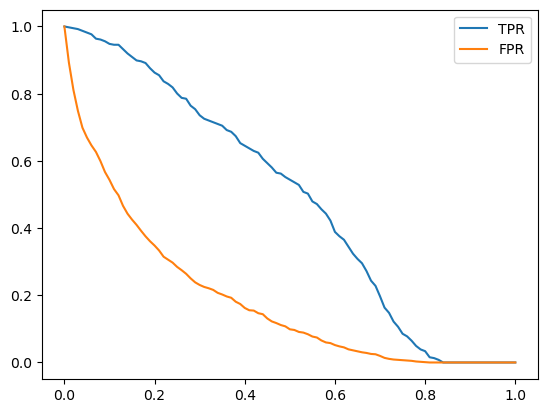

In [60]:
plt.plot(df_scores.threshold, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')
plt.legend()

These graphs alone don't give us enough insights, because we don't have anything to compare with. So what we do is: we have a baseline at a particular threshold, for us it will be a random model. It's basically for each customer flipping a coin. This customer is churning and this customer is not churning is decided completely randomly. Let's implement it. Let's assign each customer a score between 0 and 1 randomly.

### Random Model

In [61]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size = len(y_val))

In [62]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

This is how random predicitons look like. This predicts randomly if a customer is going to churn or not by giving a score.

In [63]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

So random model has an accuracy of 50%, whihc is expected. Now we want to plot the same quantities FPR etc. for rando model.

In [64]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
    df_scores['fpr']= df_scores.fp / (df_scores.fp+df_scores.tn)
    
    return df_scores

In [65]:
# now we can use the function above for getting the dataframe with random predicitons 
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [66]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


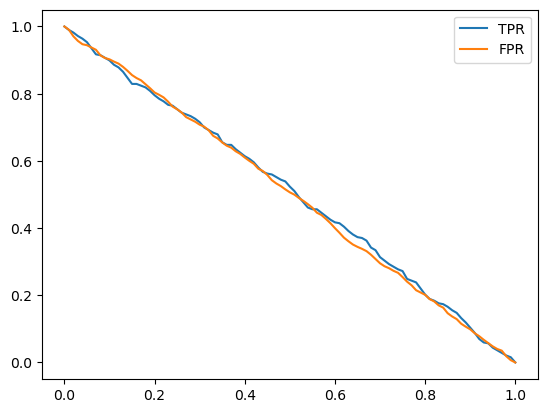

In [67]:
plt.plot(df_rand.threshold, df_rand.tpr, label = 'TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label = 'FPR')
plt.legend()

This we see both of them go down. It's a almost straight line

Now let's talk about a different benchmark. 

### Ideal Model

Here we want to talk about the ideal scoring model. Here we start with predicitions of customers and then we order them from smallest score to largest score. Thus first block of customers are all non-churning and after that all are churning.

In [68]:
# num_neg = number of negative i.e. non-churning
num_neg = (y_val == 0).sum() #how many 0s are there in y_val 
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [69]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal
# this is kind of our validation set in a way.

array([0, 0, 0, ..., 1, 1, 1])

Now we need to create our prediciton. It can be just numbers between 0 and 1

In [70]:
y_ideal_pred = np.linspace(0,1, len(y_val))

In [71]:
(y_ideal_pred >= 0.72 ).mean()

0.2803406671398155

In [72]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [73]:
1- y_val.mean()

0.7260468417317246

This is how ideal model looks like. This doesn't exist in reality. But this helps us to benchmark. Lets do the same exercise for ideal model as we did for random model.

In [74]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [75]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


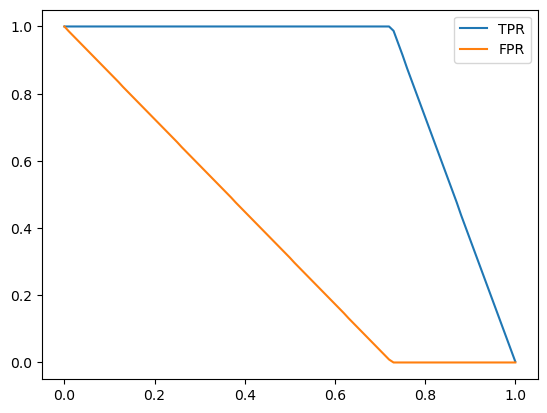

In [76]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'FPR')

plt.legend()

Let's now put our all models (Benchmarks) together.

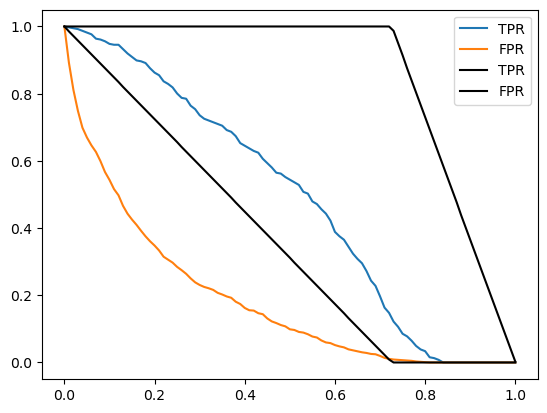

In [77]:
plt.plot(df_scores.threshold, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')

#plt.plot(df_rand.threshold, df_rand.tpr, label = 'TPR')
#plt.plot(df_rand.threshold, df_rand.fpr, label = 'FPR')

plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'FPR', color = 'black')

plt.legend()

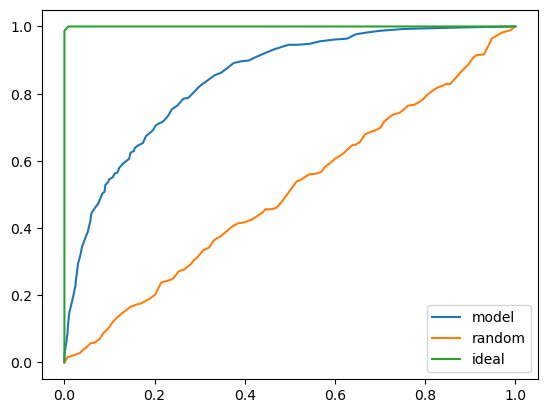

In [78]:
plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.legend()

ROC curves are square. Not like rectangular above here.

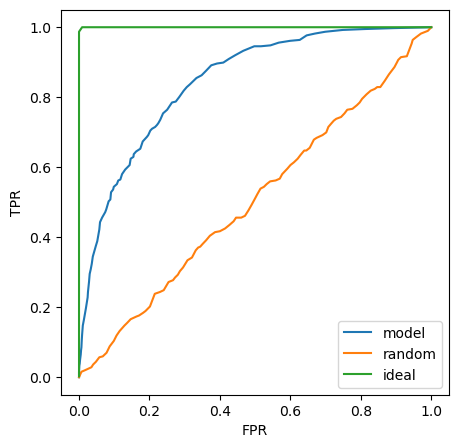

In [79]:
plt.figure(figsize = (5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

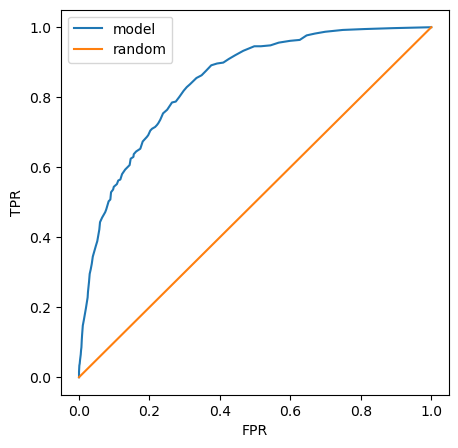

In [80]:
plt.figure(figsize = (5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random')
#plt.plot(df_rand.fpr, df_rand.tpr, label = 'random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

This is how ROC curve looks like. We want our models to be as close to the ideal spot of TPR = 1.0, and as far as possible from random line. This is where we make no mistakes.

Let's try to understand what kind of information is there. [explained in video]

end of video: [ML Zoomcamp 4.5 - ROC Curves](https://www.youtube.com/watch?v=dnBZLk53sQI&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=44&t=2s)

start of video: [ML Zoomcamp 4.5 Continued - Plotting ROC Curves With Scikit-Learn](https://www.youtube.com/watch?v=B5PATo1J6yw&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=45)

We can use scikit directly to plot the ROC curve.

In [81]:
from sklearn.metrics import roc_curve

It does very similar to what we did.

In [82]:
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)

roc_curve outputs 3 things: fpr, tpr and thresholds.

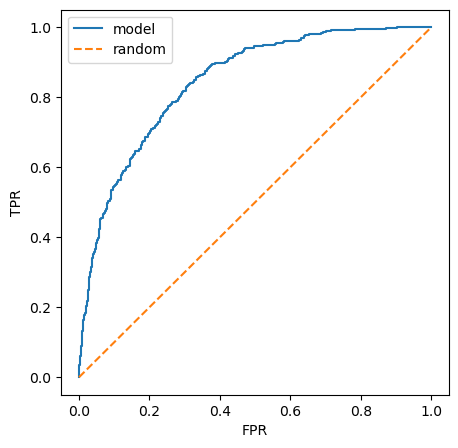

In [83]:
plt.figure(figsize = (5,5))

plt.plot(fpr, tpr, label = 'model')
plt.plot([0,1],[0,1], label = 'random', linestyle = '--')


plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

This is how we can use sci-kit learn to draw the ROC curve. We don't need to do this manually.

end of video: [ML Zoomcamp 4.5 Continued - Plotting ROC Curves With Scikit-Learn](https://www.youtube.com/watch?v=B5PATo1J6yw&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=45)

start of video: [ML Zoomcamp 4.6 - ROC AUC](https://www.youtube.com/watch?v=hvIQPAwkVZo&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=46)

## 4.6 ROC AUC

* Area under the ROC curve - useful metric
* Interpretation of AUC

In the previous session, we talked about ROC curve as a way of understanding how model performs across all the thresholds from 0 to 1. We managed to plot ROC curve. In this plot closer we are to the ideal point of TPR = 1.0, better our model is. One way of measuring how close we are to this point is area under this curve (AUC). ROC AUC is a useful metric for evaluating binary classification model.By measuring AUC we cann see how good our model is, i.e. how close it is to the ideal point and how far it is from the random model. Area under the curve is area with the FPR axis. Thus larger AUC is, better is our model. Area under curve for random moderl is **0.5** and for ideal is **1.0**. These are the two extremes.

In [84]:
from sklearn.metrics import auc

auc method from sklearn is not specifically for ROC curves. It is for area under any curve.

In [85]:
auc(fpr, tpr)

0.8438530381535563

In [86]:
auc(df_scores.fpr, df_scores.tpr)  #for our model

0.8438732975754537

One from scikit learn is more accurate.

In [87]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [88]:
auc(df_rand.fpr, df_rand.tpr)

0.5060233793728696

In [89]:
fpr, tpr, thresholds  = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438530381535563

There is a shortcut for above two lines in scikit learn.

In [90]:
from sklearn.metrics import roc_auc_score

In [91]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

AUC has a very good and useful interpretation.

What is the probbaility that in a randomly selected pair of positive and negative example (customer), positive has higher score than negative ones. We can do this many times with many pairs. Positive means churn. Negative means no churn. **AUC** is exactly telling us this probability.

We can see this in code.

In [92]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [93]:
neg

array([0.00899659, 0.20450807, 0.21220846, ..., 0.1078685 , 0.31366579,
       0.13638706])

In [94]:
import random

In [95]:
pos_ind = random.randint(0, len(pos)-1)
neg_ind = random.randint(0, len(neg)-1)
pos_ind, neg_ind

(301, 995)

In [96]:
pos[pos_ind] > neg[neg_ind]

False

In this case, it happens to be true. We can repeat this many times, e.g 10000 times.

In [97]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
        
success /n

0.84497

It is preety close to AUC. This is a good interpretation of AUC. How well our model can order customers.

We can implement the same thing with numpy, instead of doing this loop 100000 times. 

In [98]:
pos_ind = np.random.randint(0, len(pos), size = n)

neg_ind = np.random.randint(0, len(neg), size = n)
neg_ind

array([1005,  781,  792, ...,  930,  540,  225])

In [99]:
pos[pos_ind]> neg[neg_ind] 

array([False,  True,  True, ...,  True,  True,  True])

In [100]:
(pos[pos_ind]> neg[neg_ind]).mean()

0.84297

end of video: [ML Zoomcamp 4.6 - ROC AUC](https://www.youtube.com/watch?v=hvIQPAwkVZo&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=46)

start of video: [ML Zoomcamp 4.7 - Cross-Validation](https://www.youtube.com/watch?v=BIIZaVtUbf4&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=47&t=1s)

## 4.7 Cross-Validation (K-Fold)

* Evaluating the same model on different subsets of data.
* Getting the average prediction and spread within prediction.

In last module, we talked about **AUC** which is a good way of measuring the performance of binary classification model. In this lesson, we'll talk about parameter tuning. **Parameter tuning** is the process of selecting the best parameter.

In our usual 60/20/20 split, we throw train dataset away and we use validation dataset to find the best parameter for model $g(x_{i})$. It is not the only way of validating our models. Usually we always set aside our training data set. But for validation dataset we have different options. We have full_train dataset. We can split full_train dataset into 3 parts for **K=3**. We use part 1 and part 2 for training our model. We train our model and have model $g(x_{i})$. We evaluate this model on part number 3. Part 3 is used for validation and then we compute **AUC** on this pat-3 validation dataset. This is very similar to what we do, except that now validation is 33% of full_train and rest part-1 and part-2 is together 67%. But we don't stop here. Then we use part 2 for validation. Then we use part 1 and 3 for training. We train on a different dataset and we validate on another dataset (on part-2). We record AUC or other metric again. Then we again train on part 2 and 3 and validate on 1. We record AUC or other metric again. Now we have 3 scors: AUC1, AUC2, AUC3. Then we compute mean score and standard deviation. Each one of them is called fold. For each fold we have AUC. Standard deviation tells us how stable the model is. How standard deviations vary across different folds. Let's implement it. Let's create a function for training first below.

In [101]:
def train(df_train, y_train, C=1.0): #C is a parameter in LogistcRegression similar to regularization
    # deafult value of C is 1.0
    dicts = df_train[categorical+numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter = 1000)
    model.fit(X_train, y_train)
    
    return dv, model

In above function, we neeed to return model, but also we need to return the vectorizer (dv). Because vectorizer knows how to transform dictionaries into feature matrix and then model knows what to do after they are transformed. This is what happens inside train function. We can use it now. 

In [102]:
dv, model = train(df_train, y_train, C=0.001)

In [103]:
def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')
    # I believe it is wrong in above line. It should be df_val or just df.
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred   

In [104]:
y_pred = predict(df_val, dv, model)

Now we have this two functions we can use. Now let's use **K-fold cross validation**.

In [105]:
from sklearn.model_selection import KFold

In [106]:
kFold = KFold(n_splits=10, shuffle = True, random_state = 1)

In [107]:
kFold.split(df_full_train)

<generator object _BaseKFold.split at 0x7f0f1bf554a0>

In [108]:
next(kFold.split(df_full_train))#use next method to see what is inside.

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,   21,   28,   33,   44,   58,   67,   72,   79,   81,   82,
          98,  101,  116,  119,  125,  126,  136,  141,  147,  161,  169,
         179,  192,  196,  200,  206,  214,  222,  231,  250,  255,  259,
         276,  280,  285,  301,  308,  313,  314,  325,  343,  354,  359,
         383,  386,  407,  420,  428,  433,  440,  447,  457,  473,  486,
         496,  501,  503,  507,  545,  554,  557,  566,  574,  580,  582,
         592,  605,  608,  623,  634,  636,  645,  662,  667,  684,  687,
         689,  729,  745,  758,  763,  778,  783,  792,  795,  808,  839,
         840,  847,  850,  858,  867,  870,  871,  881,  899,  906,  927,
         929,  931,  940,  943,  976,  984,  987,  988, 1005, 1016, 1028,
        1034, 1038, 1050, 1056, 1074, 1079, 1117, 1122, 1123, 1131, 1134,
        1139, 1144, 1155, 1159, 1163, 1169, 1179, 1198, 1206, 1216, 1238,
        1247, 1256, 1272, 1297, 1298, 1310, 1344, 1356, 1370,

It returns two arrays. First one is indices for train  part, second one is for validation part.

In [109]:
train_idx, val_idx = next(kFold.split(df_full_train))

In [110]:
len(train_idx), len(val_idx)

(5070, 564)

In [111]:
len(df_full_train)

5634

In [112]:
df_train = df_full_train.iloc[train_idx]
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
611,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2250-ivbwa,male,0,yes,yes,64,yes,no,fiber_optic,yes,...,no,no,no,no,month-to-month,no,electronic_check,81.05,5135.35,0
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [113]:
df_val = df_full_train.iloc[val_idx]

In [114]:
!pip install tqdm

In [115]:
from tqdm.auto import tqdm

In [116]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []

    kFold = KFold(n_splits=n_splits, shuffle = True, random_state = 1)
    
    for train_idx, val_idx in kFold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print('C=%s %.3f +- %.3f'%(C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.008
C=0.5 0.840 +- 0.007
C=1 0.840 +- 0.008
C=5 0.841 +- 0.008
C=10 0.841 +- 0.008


Now we want to train our final model on the full_train dataset and validate on the test dataset.

In [117]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)
auc

0.8539071569765617

Little difference between training (84%) and validation(85.3%) is okay.

***When we should use Cross-validation and when usual validation?***

For most of the dataset usual hold-out dataset is fine, speccially in cases when dataset is quite large. If our dataset is smaller and we also want to have standard deviation to understand how stable our model is, how much it varies across different folds, then we can do cross-validation. For bigger datasets, 2-3 splits are fine. For smaller datasets may be we'll do 10.

end of video: [ML Zoomcamp 4.7 - Cross-Validation](https://www.youtube.com/watch?v=BIIZaVtUbf4&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=47&t=1s)

start of video: [ML Zoomcamp 4.8 - Summary](https://www.youtube.com/watch?v=-v8XEQ2AHvQ&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=48)

## 4.8 Summary

* **Metric** - a single number that describes the performance of a model
* **Accuracy** - fraction of correct answers; sometimes misleading
* **Precision and recall** are less misleading when we have class inbalance
* **ROC Curve** - a way to evaluate the performance at all thresholds; okay to use with imbalance
* **K-Fold CV** - more reliable estimate for performance (mean + std)

## 4.9 Explore more

* Check the precision and recall of the dummy classifier that always predict "FALSE"
* F1 score = 2 P R / (P + R)
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

Other projects:

* Calculate the metrics for datasets from the previous week